# Predicción de precios de acciones de Apple con Red Neuronal Recurrente

Primero, entendamos bien el perceptrón multicapa:

![neurona](neurona.jpg)

### El Perceptrón

Es una neurona computacional que emite una señal de salida después de computar cálculos. la capa de entrada simula las dentritas de una neurona real, mientras que la señal de salida es el axón. Sola no es de mucha utilidad pero en grupos pueden similar la complejidad del cerebro.

![neurona](perceptron.jpg)

A cada señal de entrada se le asigna un **peso** 'wi', el cual es multiplicado por los valores de entrada para que luego la neurona guarde la suma ponderada de todos esos valores de entrada.

Posteriormente, esos pesos se computan en la fase de entrenamiento, a través de **algoritmos optimizadores y de propagación**.

Se aplica una **función de activación** a la suma ponderada de pesos, que se traduce en la señal de salida de la neurona.

## Predicción de precios de acciones

Este es uno de los problemas más complejos de la actualidad, porque la predicción está sujeta a gran cantidad de factores exógenos (no presentes en los datos), pero aún así, vamos a demostrar el poder de las redes con lo que se tiene a disposición.

En este ejemplo, OHLCV (Open-High-Low-Close-Volume) corresponden a la capa de entrada, hay además una capa escondida o intermedia, y finalmente una capa de salida.

![net](net.jpg)

### Entrenamiento de la Red Neuronal

Este entrenamiento consiste en ajustar los pesos de las variables para todas las neuronas. Este proceso se realiza a través de la minimización de una **función de costos**, la cual mide qué tan distantes son el valor predecido y* contra el valor actual y.

La función más popular es aquella que computa la mitad de suma de diferencias al cuadrado entre estos dos valores:

![cost](cost.png)

El proceso a través del cual la red entrena consiste en computar estra función de costo para un connunto de pesos de las neuronas, luego se devuelve para ajustar los pesos, cosa que la función de costos se minimice todavía más. A esto se le conoce como propagación hacia atrás o **backpropagation**.

El mejor conjunto de pesos sería la función de costos que corresponde al mínimo de este gráfico.

![costminima](costminima.jpg)

El problema es que entre más capas tenga la red, más pesos hay que ajustar, y el número de operaciones computacionales incrementa de forma exponencial.

Entrenar un modelo así tomaría un tiempo inimaginable aun en la mejor supercomputadora del mundo. Por esta razón, para computar los pesos se utiliza una metodología mucho más eficiente llamada **Descenso de gradiente**.

### Descenso de gradiente

Se encarga de analizar la pendiente de la curva de la función de costos; basado en dicha pendiente, se ajustan los pesos de a trozos en lugar de computar todos las posibles combinaciones a la vez.

![gradient](gradient.jpg)

Entre las variaciones de este método se encuentran:

- batch gradient descent
- stochastic gradient descent
- mini-batch gradient descent

### Backpropagation

Peermite actualizar todos los pesos de la red de forma simultánea, lo cual reduce de manera drástica la complejidad. De no utilizarse, se estaría verificando el impacto de cada peso uno por uno.

Los pasos para entrenar una red neuronal con Descenso de gradiente estocástico:

- Inicializar los pesos con números muy cercanos a cero, pero no cero.
- Forward propagation: las neuronas se activan de izquierda a derecha, utilizando la primera entrada hasta llegar a la última capa.
- Calcular el error.
- Backpropagation: El error se desplazará de derecha a izquierda, y los pesos se ajustarán de acuerdo a la tasa de aprendizaje.
- Repetir los 3 pasos anteriores.
- Esto marca el final de la primera época o iteración, y se repetirá el número de veces que sea necesario.

## Long Short Term Memory

![nets](nets.png)

Cuando se está leyendo este cuaderno cada pedazo de información que leemos lo almacenamos, y este sirve para entender la información siguiente. Así funciona una red neuronal recurrente, que contrario a las redes estándar, no empieza a amprender de cero con cada pedazo de información, sino que lo tiene en cuenta para el futuro.

En ese sentido, este tipo de red incorpora bucles que le permiten a la información persistir.
![rnn](rnn.png)

Este tipo de red se enfrenta a un problema: Dependencias de largo plazo

Suponga que estamos construyendo un predictor de texto, tal como el que utilizan los celulares, no necesitamos que la persona escriba un ensayo para predecir la siguiente palabra. En otras situaciones, la red al contener un historial tan gigante de información, es incapaz de conectar la información más relevante en ese mar de datos.

LSTM - Long Short Term Memory soluciona el problema anterior a través de configuraciones más sofisticadas en las neuronas.

## Código

In [1]:
!pip install pandas-datareader

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\User\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


Acciones de Apple

In [3]:
# Extraer las acciones 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 
# Ver los datos
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,270.128906
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.817261
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,274.498535


Dimensión de los datos

In [4]:
df.shape

(2003, 6)

Visualizar la serie de tiempo

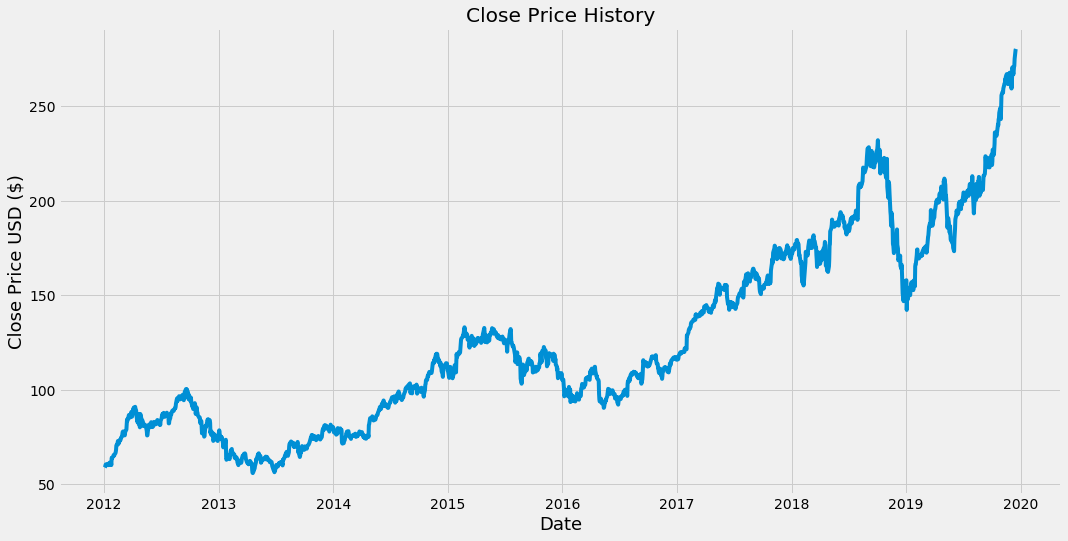

In [5]:
# Visualizar el historial del precio de cierre
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

Nuevo dataframe con solo la columna del precio de cierre

In [6]:
data = df.filter(['Close'])
# Convertir en arreglo de numpy
dataset = data.values
# Longitud de los datos de entrenamiento
training_data_len = math.ceil( len(dataset) *.8) 

Es buena práctica normalizar los datos para facilitarle la tarea a la red neuronal

In [7]:
# Normalización con MinMax
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

Entrenamiento y prueba

In [8]:
# Datos de entrenamiento
train_data = scaled_data[0:training_data_len  , : ]

# Partición
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [9]:
# Convertir todo en arreglos de numpy
x_train, y_train = np.array(x_train), np.array(y_train)

Este tipo de red recurrente necesita que los datos tengan 3 dimensiones, igual que las redes convolucionadas. Aquí las dimensiones son los datos, los 'time steps' y las variables

In [10]:
# Utilizar reshape
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

Arquitectura del modelo

In [11]:
# LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [12]:
# Compilar el modelo como Adam y raíz del error cuadrático medio
model.compile(optimizer='adam', loss='mean_squared_error')

Entrenamiento

In [13]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1543/1543 [==============================] - 93s 60ms/step - loss: 8.1093e-04


In [14]:
# Datos de prueba
test_data = scaled_data[training_data_len - 60: , : ]

# Partición
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [15]:
# Convertir en arreglo de numpy 
x_test = np.array(x_test)

In [16]:
# Utilizar reshape
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

Predicción

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Deshacer normalización

In [18]:
# Raíz del error cuadrático medio
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.795900769707812

Graficar

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


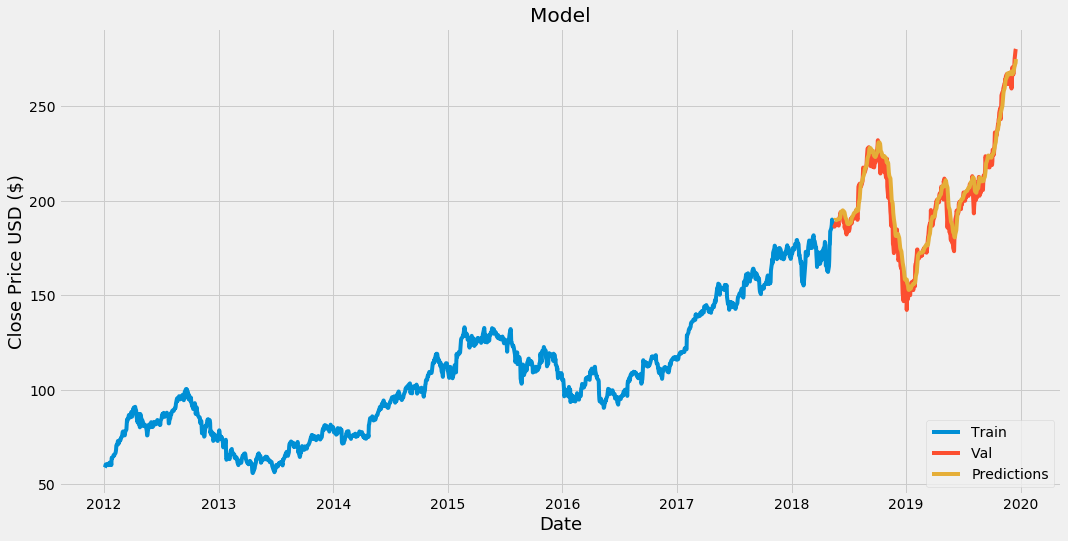

In [19]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualziar
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
# Validación contra predicciones
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,189.828430
2018-05-18,186.309998,189.944183
2018-05-21,187.630005,189.813080
2018-05-22,187.160004,189.769745
2018-05-23,188.360001,189.707489
...,...,...
2019-12-11,270.769989,269.481995
2019-12-12,271.459991,270.485657
2019-12-13,275.149994,271.530548
